Rice Image Dataset

DATASET: https://www.muratkoklu.com/datasets/

Citation Request: See the articles for more detailed information on the data.

Koklu, M., Cinar, I., & Taspinar, Y. S. (2021). Classification of rice varieties with deep learning methods. Computers and Electronics in Agriculture, 187, 106285. https://doi.org/10.1016/j.compag.2021.106285

Cinar, I., & Koklu, M. (2021). Determination of Effective and Specific Physical Features of Rice Varieties by Computer Vision In Exterior Quality Inspection. Selcuk Journal of Agriculture and Food Sciences, 35(3), 229-243. https://doi.org/10.15316/SJAFS.2021.252

Cinar, I., & Koklu, M. (2022). Identification of Rice Varieties Using Machine Learning Algorithms. Journal of Agricultural Sciences https://doi.org/10.15832/ankutbd.862482

Cinar, I., & Koklu, M. (2019). Classification of Rice Varieties Using Artificial Intelligence Methods. International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194. https://doi.org/10.18201/ijisae.2019355381

DATASET: https://www.muratkoklu.com/datasets/

Highlights
• Arborio, Basmati, Ipsala, Jasmine and Karacadag rice varieties were used.
• The dataset (1) has 75K images including 15K pieces from each rice variety. The dataset (2) has 12 morphological, 4 shape and 90 color features.
• ANN, DNN and CNN models were used to classify rice varieties.
• Classified with an accuracy rate of 100% through the CNN model created.
• The models used achieved successful results in the classification of rice varieties.

Abstract
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. A second dataset with 106 features including 12 morphological, 4 shape and 90 color features obtained from these images was used. 

Models were created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes were performed. Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables. 

Classification successes from the models were achieved as 99.87% for ANN, 99.95% for DNN and 100% for CNN. With the results, it is seen that the models used in the study in the classification of rice varieties can be applied successfully in this field.

In [9]:
# Source of this work from the below mentioned kaggle:

#https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/code
#https://www.kaggle.com/code/harrywangatx/99-accuracy-classification-w-simple-cnn/notebook

**1. Import Libraries**

In [11]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [13]:
# Arborio, Basmati, Ipsala, Jasmine, Karacadag

path = './Rice_Image_Dataset'
#Please download the Rice Image Dataset from https://www.muratkoklu.com/datasets/ or alternatively from #https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/

import tensorflow as tf
import tensorflow.keras.layers as tfl
print(tf. __version__)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_ds = train_datagen.flow_from_directory(
        path,
        subset='training',
        target_size=(256 , 256),
        batch_size=32)

val_ds = train_datagen.flow_from_directory(
        path,
        subset='validation',
        target_size=(256 , 256),
        batch_size=32 )

2.1.0
Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


***Understanding of Convolutional Neural Network (CNN) — Deep Learning***

**filters:**
Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

**kernel_size**
An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

**strides**
An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

**Padding**
* One of "valid" or "same" (case-insensitive). 

* "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.

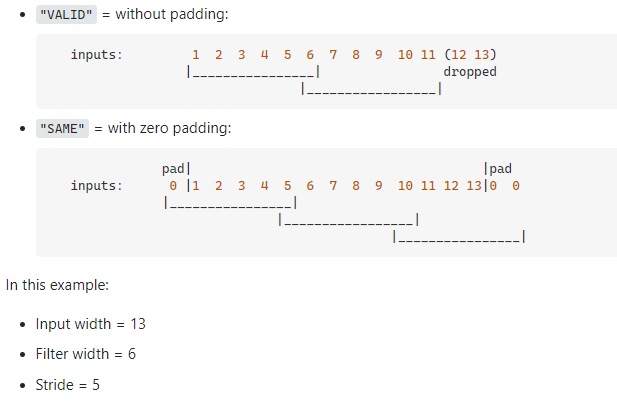


**Pooling layers**
section would reduce the number of parameters when the images are too large. Spatial pooling also called subsampling or downsampling which reduces the dimensionality of each map but retains important information. Spatial pooling can be of different types:

* Max Pooling
* Average Pooling
* Sum Pooling

Max pooling takes the largest element from the rectified feature map. Taking the largest element could also take the average pooling. Sum of all elements in the feature map call as sum pooling.

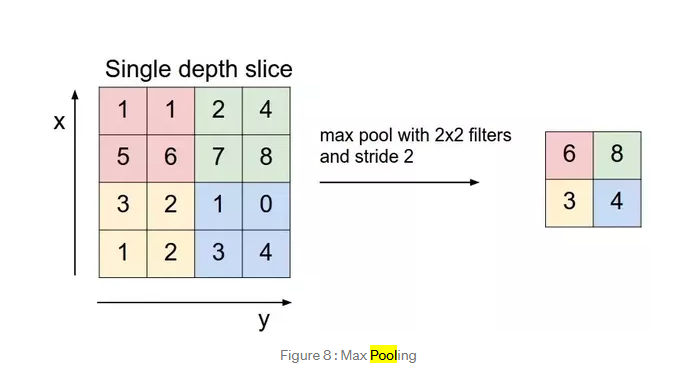

**Fully Connected Layer**

The layer we call as FC layer, we flattened our matrix into vector and feed it into a fully connected layer like a neural network.


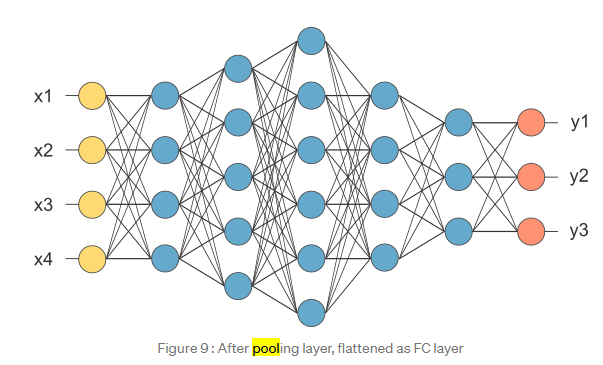

In the above diagram, the feature map matrix will be converted as vector (x1, x2, x3, …). With the fully connected layers, we combined these features together to create a model. Finally, we have an activation function such as softmax or sigmoid to classify the outputs as cat, dog, car, truck etc.,

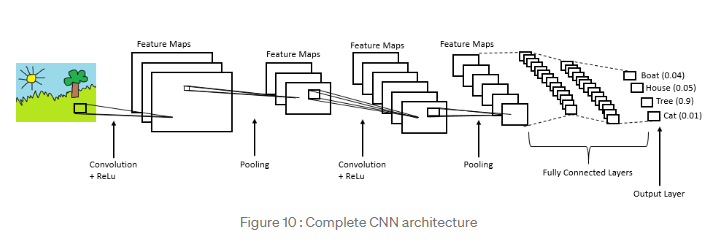

**Summary**

* Provide input image into convolution layer
* Choose parameters, apply filters with strides, padding if requires. Perform convolution on the image and apply ReLU activation to the matrix.
* Perform pooling to reduce dimensionality size
* Add as many convolutional layers until satisfied
* Flatten the output and feed into a fully connected layer (FC Layer)
* Output the class using an activation function (Logistic Regression with cost functions) and classifies images.

Source: https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148#:~:text=Strides,with%20a%20stride%20of%202.

In [6]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    X = tfl.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='SAME')(input_img)
    X = tfl.ReLU()(X)
    X = tfl.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='SAME')(X)
    X = tfl.Conv2D(16, kernel_size=(2,2), strides=(1,1), padding='SAME')(X)
    X = tfl.ReLU()(X)
    X = tfl.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='SAME')(X)
    X = tfl.Flatten()(X)
    outputs = tfl.Dense(units=5, activation="softmax")(X)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [7]:
conv_model = convolutional_model((256, 256, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 8)       392       
_________________________________________________________________
re_lu (ReLU)                 (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        528       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0     

In [8]:
history = conv_model.fit(train_ds, epochs=10, validation_data=val_ds)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1875 steps, validate for 469 steps
Epoch 1/10
1875/1875 [==============================] - 441s 235ms/step - loss: 0.2191 - accuracy: 0.9226 - val_loss: 0.1159 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 412s 220ms/step - loss: 0.1212 - accuracy: 0.9585 - val_loss: 0.1255 - val_accuracy: 0.9549
Epoch 3/10
1875/1875 [==============================] - 435s 232ms/step - loss: 0.1031 - accuracy: 0.9644 - val_loss: 0.0959 - val_accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 452s 241ms/step - loss: 0.0889 - accuracy: 0.9694 - val_loss: 0.0716 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 435s 232ms/step - loss: 0.0726 - accuracy: 0.9753 - val_loss: 0.0516 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 458s 244ms/step - loss: 0.0600 - accuracy: 0.9804 - val_loss: 0.0582 - val_accuracy: 0.9797
Epoch 7/10
1875/1

C:\Suneel\Anaconda\envs\modelling\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

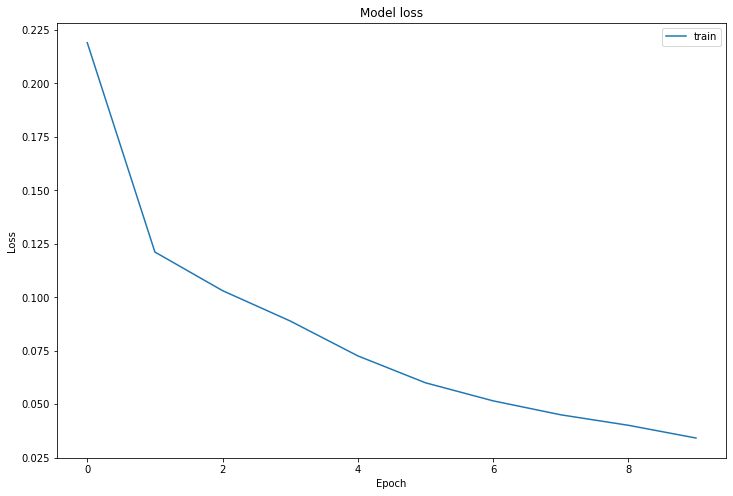

In [10]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss']]
df_loss.rename(columns={'loss':'train'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')